set of functions for shuffling images

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.defs.jigsaw_solver import read_image, show_image, write_image

In [2]:
#  --- image functions ---

# image shuffling
def shuffle_image(image, n):
    h, w = int(image.shape[0] / n), int(image.shape[1] / n)
    rows = [image[i * h:(i + 1) * h, :, :] for i in range(n)]

    image_parts = []

    for i in rows:
        for j in range(n):
            image_parts.append(i[:, j * w:(j + 1) * w:, :])

    shuffling = list(range(n * n))
    np.random.shuffle(shuffling)
    shuffling = np.array(shuffling).reshape(n, n)

    return make_image(image_parts, shuffling)

# image construction
def make_image(image_parts, image_order):
    cols = []
    n = image_order.shape[1]      # no of columns

    for i in range(n):
        idx = image_order[:, i]  # get column
        __col = image_parts[idx[0]]  # get first image
    
        for j in idx[1:]:
            __col = np.concatenate((__col, image_parts[j]), axis=0)
        cols.append(__col)
    
    result = cols[0]
    cols_len = len(cols)

    for i in range(1, cols_len):
        result = np.concatenate((result, cols[i]), axis=1)
    
    return result


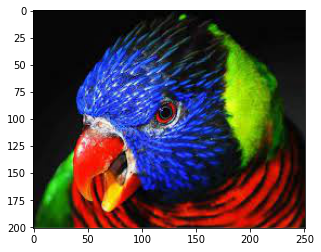

In [3]:
image = read_image('image.jpeg')
show_image(image)

In [4]:
# --- image shuffling ---

# number of square to cut the image in
n = 4

shf = shuffle_image(image, n)
write_image(shf, 'shuffled_image.png')

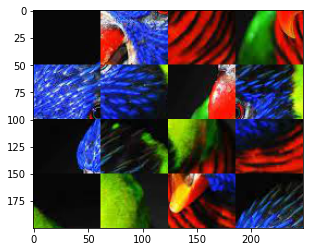

In [5]:
shfi = read_image('shuffled_image.png')
show_image(shfi)